In [1]:
from QuantResearch import fetch_data 
# Download data for Apple from Yahoo Finance 
ticker = "AAPL" 
data = fetch_data(ticker, "2023-01-01", "2024-01-01") 
# Display first few rows 
print(data.head()) 
print(f"Rows: {len(data)}, Columns: {len(data.columns)}")

[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Date                                                                     
2023-01-03  123.211197  125.070000  130.899994  124.169998  130.279999   
2023-01-04  124.482048  126.360001  128.660004  125.080002  126.889999   
2023-01-05  123.161942  125.019997  127.769997  124.760002  127.129997   
2023-01-06  127.693565  129.619995  130.289993  124.889999  126.010002   
2023-01-09  128.215698  130.149994  133.410004  129.889999  130.470001   

Price          Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  
Rows: 250, Columns: 6


In [2]:
from QuantResearch import Rsi 
# Calculate RSI with period 14 
data['rsi'] = Rsi(data['Close'], period=14) 
# Get latest RSI value 
current_rsi = data['rsi'].iloc[-1] 
print(f"Current RSI: {current_rsi:.2f}")

Current RSI: 40.19


In [3]:
from QuantResearch import plot_rsi 
# Plot RSI with candlestick chart 
#plot_rsi(data=data, rsi=rsi, period=14, ticker=ticker, kind='candle')
#Or traditional line chart 
plot_rsi(rsi=rsi, period=14, ticker=ticker, kind='line')

NameError: name 'rsi' is not defined

In [ ]:
# Generate signals 
oversold = data['rsi'] < 30 
# Buy signal 
overbought = data['rsi'] > 70 
# Sell signal 
print(f"Buy signals: {oversold.sum()}") 
print(f"Sell signals: {overbought.sum()}")

Buy signals: 19
Sell signals: 52


In [ ]:
from QuantResearch import bb_bands

data['bb_uuper'],data['bb_mid'],data['bb_lower']=bb_bands(data['Adj Close'])
data = data.dropna()

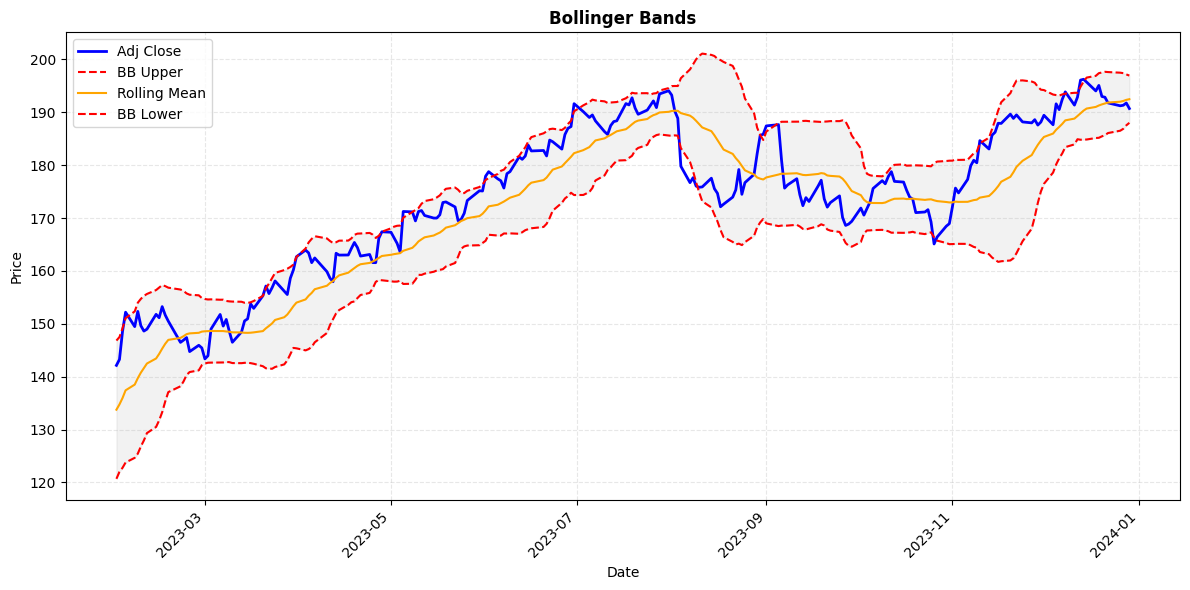

In [ ]:
#bb plot with line data
from QuantResearch import plot_bollinger
plot_bollinger(adj_close=data['Adj Close'],bb_upper=data['bb_uuper'],bb_mid=data['bb_mid'],bb_lower=data['bb_lower'])


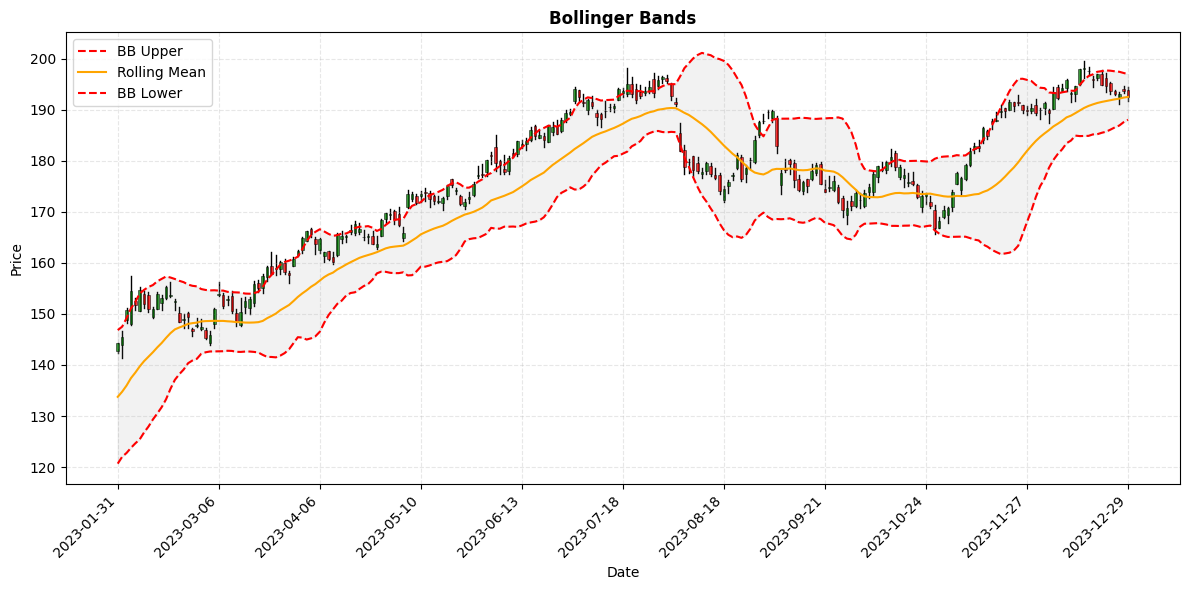

In [ ]:
plot_bollinger(data=data,adj_close=data['Adj Close'],bb_upper=data['bb_uuper'],bb_mid=data['bb_mid'],bb_lower=data['bb_lower'],kind='candle')

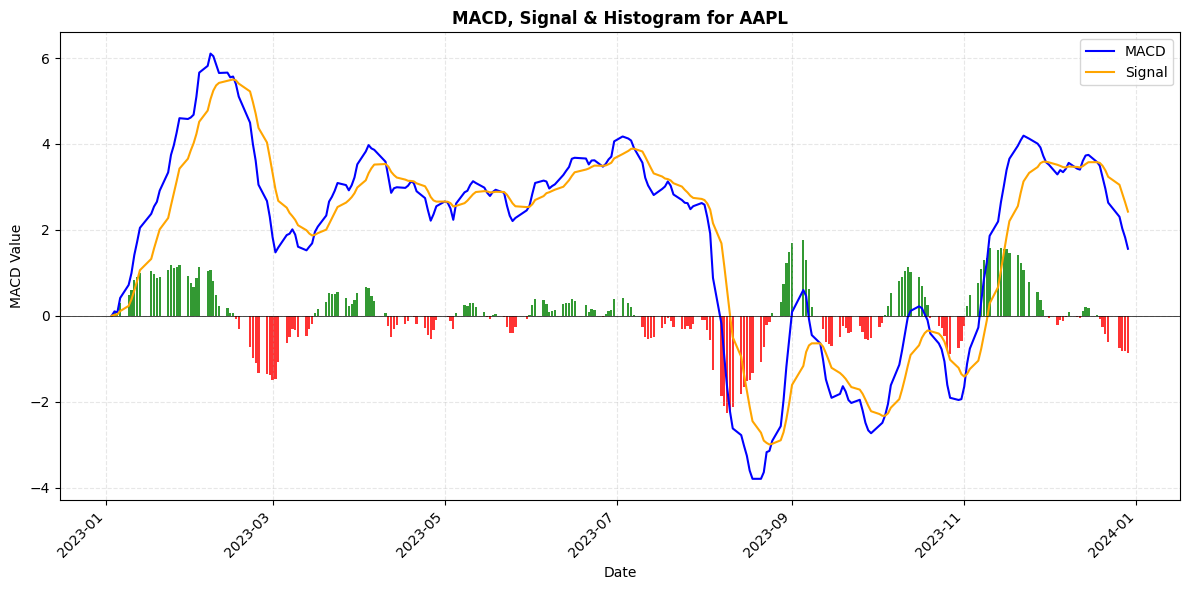

In [ ]:
from QuantResearch import macd , plot_macd

data['macd_line'],data['signal_line'],data['hist']=macd(data['Adj Close'],short_period=12,long_period=26,signal_period=9)
plot_macd(data['macd_line'],data['signal_line'],data['hist'],ticker)

avg atr for AAPL  3.143282250513004


<Axes: title={'center': 'atr for AAPL and avg atr: 3.14'}, xlabel='Date'>

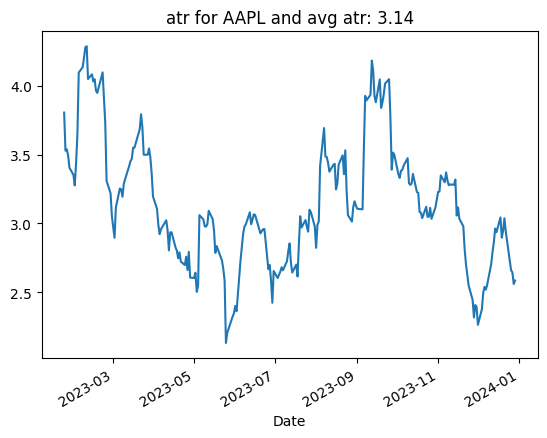

In [ ]:
from QuantResearch import atr

data['atr']=atr(data)
atr=data['atr']
print(f'avg atr for {ticker}  {atr.mean()}')
data['atr'].plot(title=f'atr for {ticker} and avg atr: {round(atr.mean(),2)}' )


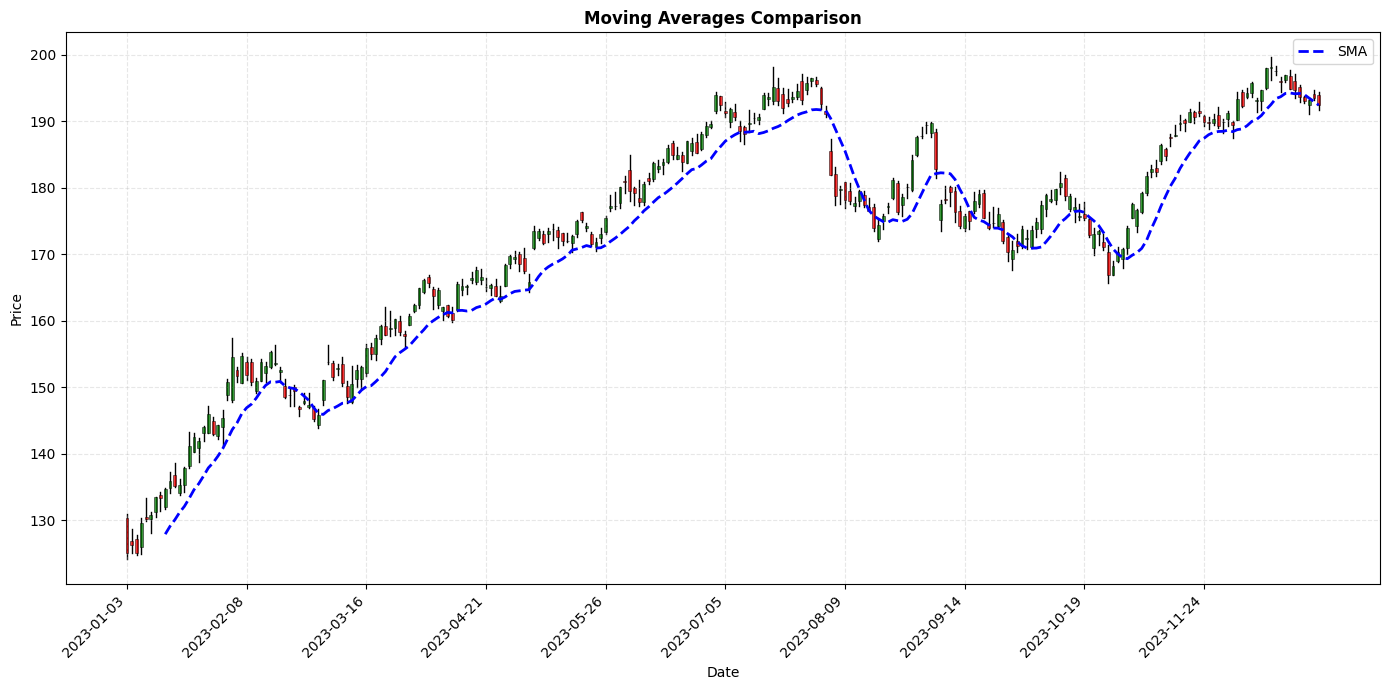

In [ ]:
from QuantResearch import sma,plot_moving_averages
data['sma']=sma(data['Adj Close'])
plot_moving_averages(data=data,price=data['Adj Close'],sma_val=data['sma'],kind='candle')

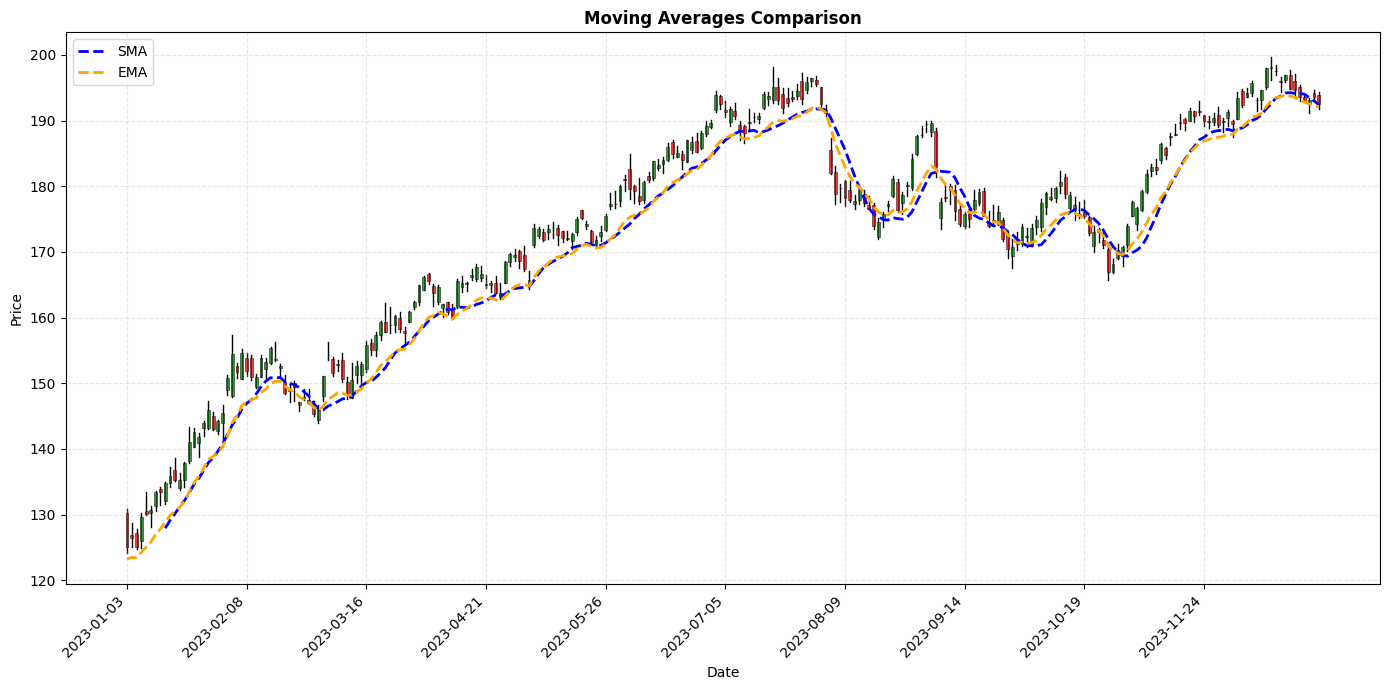

In [20]:
from QuantResearch import sma,ema,plot_moving_averages
data['ema']=ema(data['Adj Close'])
data['sma']=sma(data['Adj Close'])
plot_moving_averages(data=data,price=data['Adj Close'],sma_val=data['sma'],ema_val=data['ema'],kind='candle')

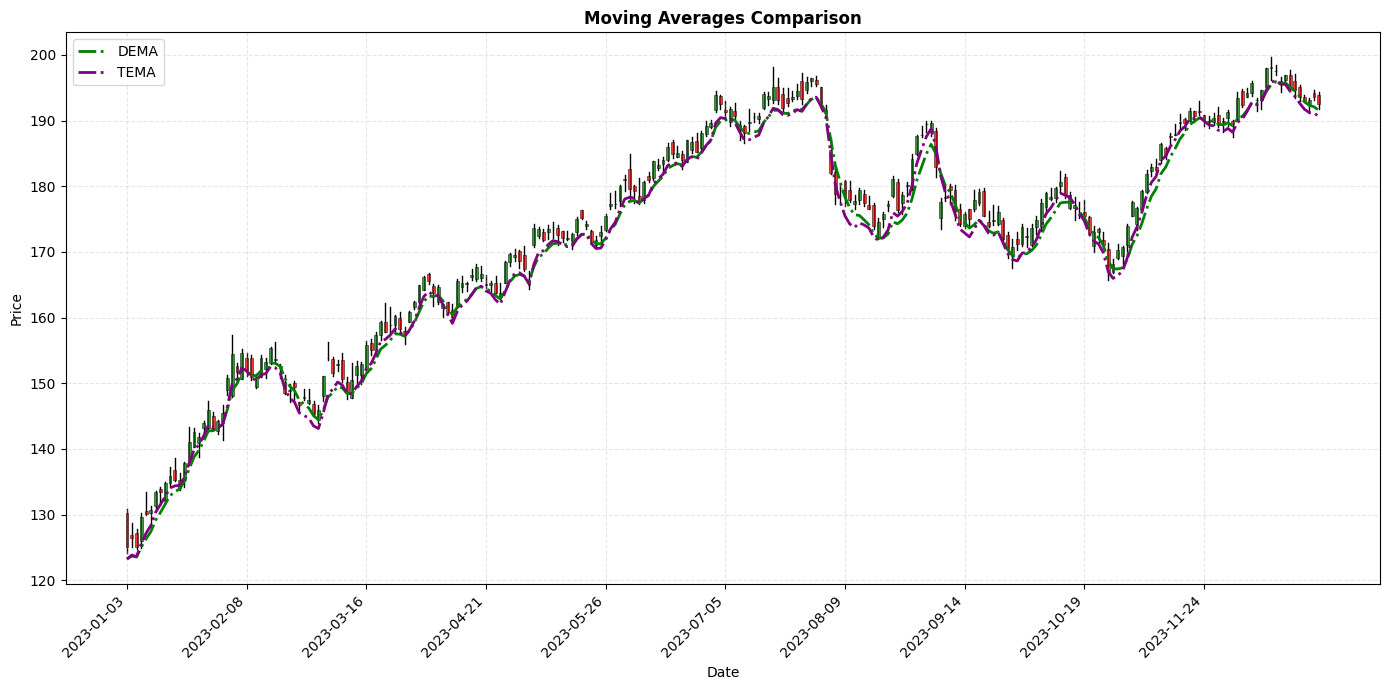

In [4]:
from QuantResearch import temma,demma,plot_moving_averages
data['temma']=temma(data['Adj Close'])
data['demma']=demma(data['Adj Close'])
plot_moving_averages(data=data,price=data['Adj Close'],tema_val=data['temma'],dema_val=data['demma'],kind='candle')

In [6]:
from QuantResearch import RVWAP
data['rvwap'] =RVWAP(data['High'],data['Low'],data['Close'],data['Volume'])
data['rvwap']

Date
2023-01-03           NaN
2023-01-04           NaN
2023-01-05           NaN
2023-01-06           NaN
2023-01-09           NaN
                 ...    
2023-12-22    194.059648
2023-12-26    194.200074
2023-12-27    194.267009
2023-12-28    194.418125
2023-12-29    194.582985
Name: rvwap, Length: 250, dtype: float64

In [13]:
data

Price,Adj Close,Close,High,Low,Open,Volume,rsi,temma,demma,rvwap
Date,,,,,,,,,,
2023-01-03,123.211197,125.070000,130.899994,124.169998,130.279999,112117500,NaN,123.211197,123.211197,NaN
2023-01-04,124.482048,126.360001,128.660004,125.080002,126.889999,89113600,NaN,123.831372,123.668703,NaN
2023-01-05,123.161942,125.019997,127.769997,124.760002,127.129997,80962700,NaN,123.577566,123.518803,NaN
2023-01-06,127.693565,129.619995,130.289993,124.889999,126.010002,87754700,NaN,125.617705,125.039977,NaN
2023-01-09,128.215698,130.149994,133.410004,129.889999,130.470001,70790800,NaN,127.151434,126.307639,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,191.788757,193.600006,195.410004,192.970001,195.179993,37149600,59.246142,192.645437,193.663473,194.059648
2023-12-26,191.243896,193.050003,193.889999,192.830002,193.610001,28919300,49.031934,191.726910,192.865700,194.200074
2023-12-27,191.342972,193.149994,193.500000,191.089996,192.490005,48087700,52.291513,191.218299,192.325920,194.267009


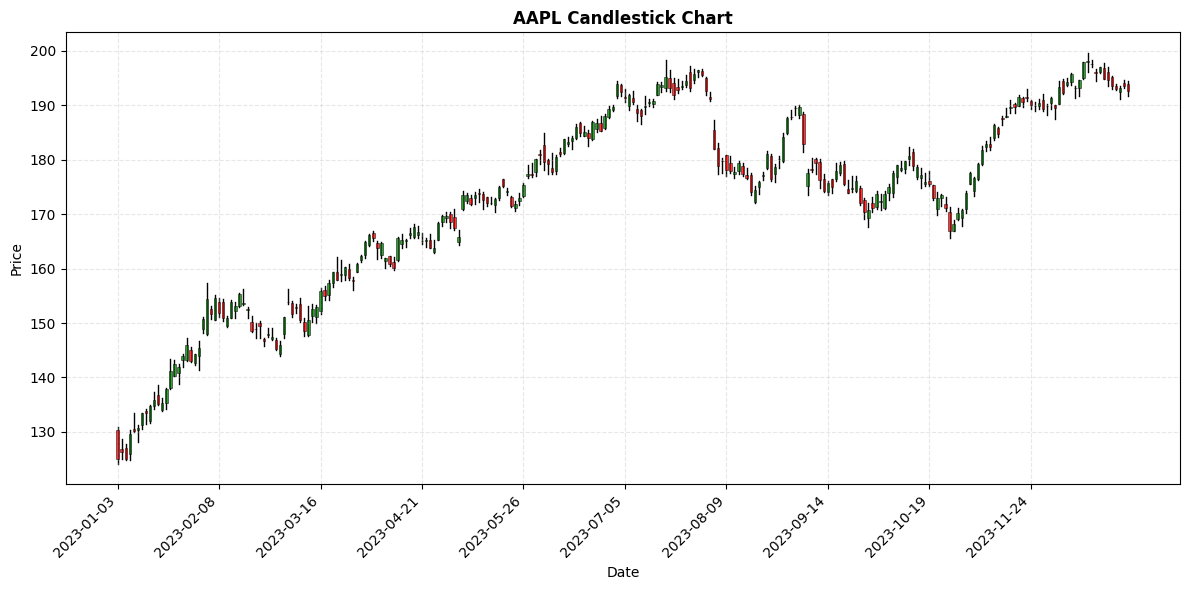

In [7]:
#plot data like candle
from QuantResearch import plot_candlestick

plot_candlestick(data=data,ticker=ticker)

In [10]:
#using dashboard

from QuantResearch.dashboard import launch_dashboard
launch_dashboard() 

Fetching data for AAPL from 2024-11-28 to 2025-11-28...


[*********************100%***********************]  1 of 1 completed


Data fetched successfully! Shape: (249, 6)
Columns: ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Date range: 2024-11-29 00:00:00 to 2025-11-26 00:00:00
Fetching data for AAPL from 2025-08-30 to 2025-11-28...


[*********************100%***********************]  1 of 1 completed


Data fetched successfully! Shape: (62, 6)
Columns: ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Date range: 2025-09-02 00:00:00 to 2025-11-26 00:00:00


c:\Users\Admin\Documents\GitHub\QuantR\QuantResearch\dashboard.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=1.5)
c:\Users\Admin\Documents\GitHub\QuantR\QuantResearch\dashboard.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=1.5)
c:\Users\Admin\Documents\GitHub\QuantR\QuantResearch\dashboard.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=1.5)


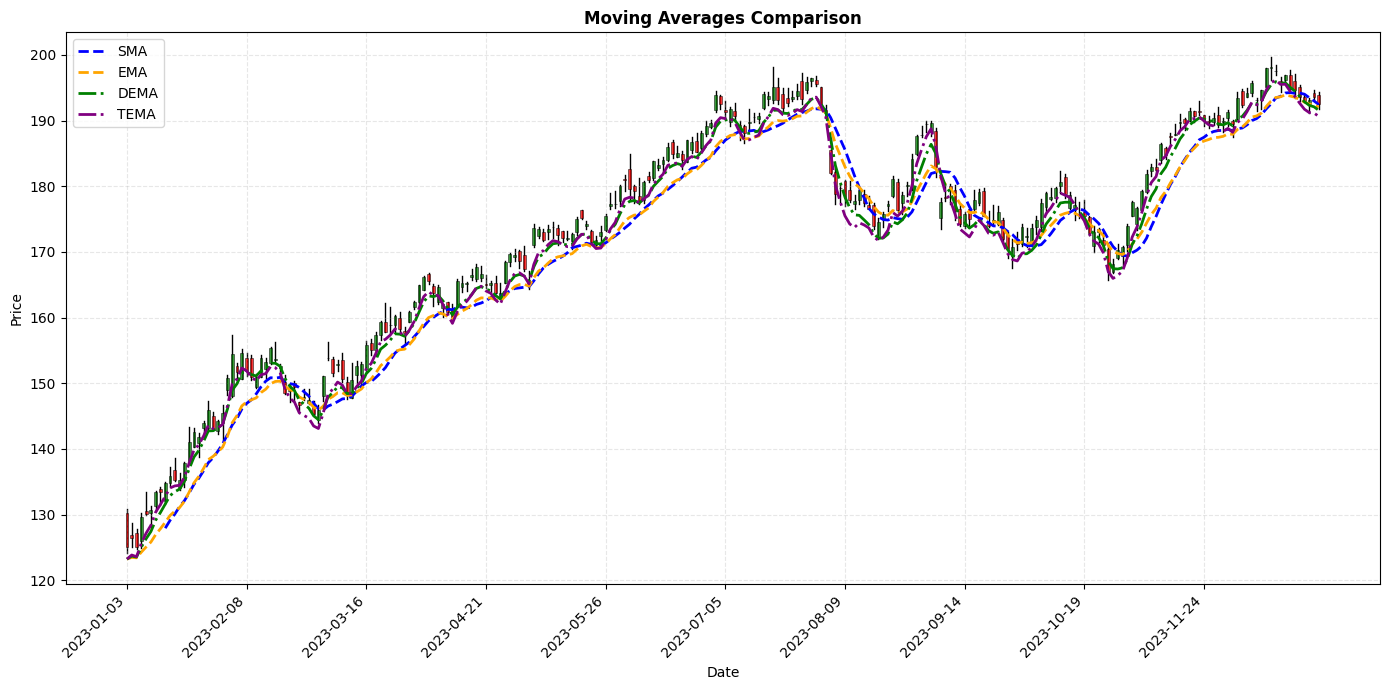

In [19]:
from QuantResearch import plot_moving_averages

plot_moving_averages(data=data,price=data['Adj Close'],ema_val=data['ema'],sma_val=data['sma'],tema_val=data['temma'],dema_val=data['demma'],kind='candle')